In [2]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')


print( "Tensorflow version", tf.__version__)
print( "Keras version", keras.__version__)

Tensorflow version 2.13.0
Keras version 2.14.0


In [3]:
df = pd.read_csv("wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [7]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [8]:
df['quality'] = df['quality'].apply(lambda x : 1 if x == 'Good' else 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
y = df['quality']
X = df.drop(columns=['quality'] , axis = 1)

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=4)

In [12]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
68,9.3,0.320,0.57,2.0,0.074,27.0,65.0,0.99690,3.28,0.79,10.7
663,10.1,0.280,0.46,1.8,0.050,5.0,13.0,0.99740,3.04,0.79,10.2
76,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5
380,8.3,0.260,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4
761,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6
...,...,...,...,...,...,...,...,...,...,...,...
360,8.2,0.700,0.23,2.0,0.099,14.0,81.0,0.99730,3.19,0.70,9.4
709,9.7,0.310,0.47,1.6,0.062,13.0,33.0,0.99830,3.27,0.66,10.0
439,7.0,0.620,0.18,1.5,0.062,7.0,50.0,0.99510,3.08,0.60,9.3
174,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5


In [13]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(256 , input_dim = X_train.shape[1] , activation='relu'),
    keras.layers.Dense(128 , activation='relu'),
    keras.layers.Dense( 64 , activation='relu'),
    keras.layers.Dense( 1 , activation='sigmoid')
])

model.compile( optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 44289 (173.00 KB)
Trainable params: 44289 (173.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size=0.3 , random_state=80)

In [17]:
X_train.shape , X_test.shape

((895, 11), (320, 11))

In [18]:
# history = model.fit(X_train , y_train , epochs=30 , validation_data=(X_val , y_val) , batch_size=32)

In [19]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/30


28/28 [==============================] - 2s 16ms/step - loss: 0.1805 - accuracy: 0.9687 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2/30
28/28 [==============================] - 0s 5ms/step - loss: 9.3497e-04 - accuracy: 1.0000 - val_loss: 4.7962e-04 - val_accuracy: 1.0000
Epoch 3/30
28/28 [==============================] - 0s 6ms/step - loss: 2.6404e-04 - accuracy: 1.0000 - val_loss: 3.2860e-04 - val_accuracy: 1.0000
Epoch 4/30
28/28 [==============================] - 0s 6ms/step - loss: 1.9013e-04 - accuracy: 1.0000 - val_loss: 2.5738e-04 - val_accuracy: 1.0000
Epoch 5/30
28/28 [==============================] - 0s 5ms/step - loss: 1.4386e-04 - accuracy: 1.0000 - val_loss: 2.0298e-04 - val_accuracy: 1.0000
Epoch 6/30
28/28 [==============================] - 0s 5ms/step - loss: 1.0923e-04 - accuracy: 1.0000 - val_loss: 1.5835e-04 - val_accuracy: 1.0000
Epoch 7/30
28/28 [==============================] - 0s 5ms/step - loss: 8.2433e-05 - accuracy: 1.0000 - val_loss: 1.2429e-04 - val

# Tensorboard

In [21]:
import time
import os
from tensorflow.keras.callbacks import TensorBoard

In [22]:
def get_log_path(log_dir = "logs/fit"):
    filename = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, filename)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\log_2023_10_22_11_21_07


# Early Stopping callback

In [23]:
early_st_cb = tf.keras.callbacks.EarlyStopping(patience=5 , restore_best_weights=True , monitor='val_loss')

# Model Checkpoint Callback

In [24]:
ckpt_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(ckpt_path , save_best_only=True)

In [27]:
history = model.fit(X_train , y_train , epochs=30 ,validation_data=(X_val, y_val), batch_size=32 , callbacks=[tb_cb , early_st_cb , checkpointing_cb])

Epoch 1/30
28/28 [==============================] - 0s 7ms/step - loss: 3.7328e-07 - accuracy: 1.0000 - val_loss: 1.4050e-06 - val_accuracy: 1.0000
Epoch 2/30
28/28 [==============================] - 0s 5ms/step - loss: 3.6089e-07 - accuracy: 1.0000 - val_loss: 1.3701e-06 - val_accuracy: 1.0000
Epoch 3/30
28/28 [==============================] - 0s 5ms/step - loss: 3.5005e-07 - accuracy: 1.0000 - val_loss: 1.3272e-06 - val_accuracy: 1.0000
Epoch 4/30
28/28 [==============================] - 0s 5ms/step - loss: 3.3783e-07 - accuracy: 1.0000 - val_loss: 1.2958e-06 - val_accuracy: 1.0000
Epoch 5/30
28/28 [==============================] - 0s 6ms/step - loss: 3.2751e-07 - accuracy: 1.0000 - val_loss: 1.2609e-06 - val_accuracy: 1.0000
Epoch 6/30
28/28 [==============================] - 0s 5ms/step - loss: 3.1758e-07 - accuracy: 1.0000 - val_loss: 1.2258e-06 - val_accuracy: 1.0000
Epoch 7/30
28/28 [==============================] - 0s 5ms/step - loss: 3.0708e-07 - accuracy: 1.0000 - val_loss

In [28]:
def save_model_path(Model_dir = "trained_model"):
    os.makedirs(Model_dir , exist_ok=True)
    filename = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(Model_dir , filename )
    print(f"Model {filename} will be saved at {model_path}")
    return model_path

unique_path = save_model_path()
unique_path

Model Model_2023_10_22_11_36_47_.h5 will be saved at trained_model\Model_2023_10_22_11_36_47_.h5


'trained_model\\Model_2023_10_22_11_36_47_.h5'

In [30]:
tf.keras.models.save_model(model , unique_path)

In [31]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.732818e-07,1.0,1.404978e-06,1.0
1,3.608908e-07,1.0,1.370050e-06,1.0
2,3.500513e-07,1.0,1.327208e-06,1.0
3,3.378307e-07,1.0,1.295776e-06,1.0
4,3.275100e-07,1.0,1.260892e-06,1.0
5,3.175834e-07,1.0,1.225788e-06,1.0
6,3.070755e-07,1.0,1.198233e-06,1.0
7,2.985194e-07,1.0,1.164447e-06,1.0
8,2.892117e-07,1.0,1.133868e-06,1.0
9,2.801109e-07,1.0,1.106491e-06,1.0


<Axes: >

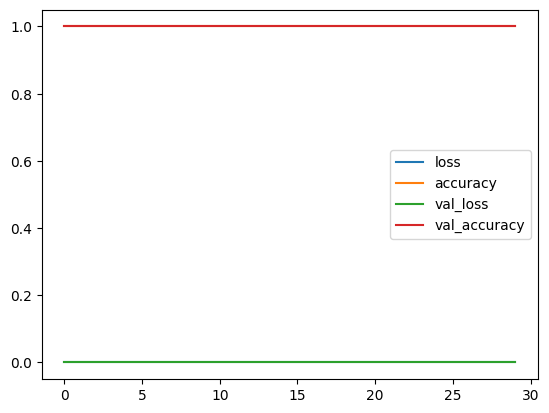

In [32]:
pd.DataFrame(history.history).plot()

In [33]:
model.evaluate(X_test , y_test)

10/10 [==============================] - 0s 1ms/step - loss: 1.5361e-07 - accuracy: 1.0000


[1.536053559902939e-07, 1.0]

In [35]:
%load_ext tensorboard

In [36]:
%tensorboard --logdir logs/fit

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               3072      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 44289 (173.00 KB)
Trainable params: 44289 (173.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
